# Dataset analysis - BigEarthNet

In [11]:
import torch
from convert_labels import convert_labels
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
labels = torch.load('./features/labels-train-bigearthnet.pth')

In [5]:
labels = np.array(labels.view(-1, 43))
labels = convert_labels(labels)

In [7]:
# retrieved from https://git.tu-berlin.de/rsim/BigEarthNet-MM_19-classes_models/-/blob/master/label_indices.json?ref_type=heads
class_names = [
        "Urban fabric",
        "Industrial or commercial units",
        "Arable land",
        "Permanent crops",
        "Pastures",
        "Complex cultivation patterns",
        "Agriculture with a lot of natural vegetation", # shortened from "Land principally occupied by agriculture, with significant areas of natural vegetation",
        "Agro-forestry areas",
        "Broad-leaved forest",
        "Coniferous forest",
        "Mixed forest",
        "Natural grassland (sparsely vegetated)", # shortened from "Natural grassland and sparsely vegetated areas",
        "Moors, heathland", # shortened from "Moors, heathland and sclerophyllous vegetation",
        "Transitional woodland, shrub",
        "Beaches, dunes, sands",
        "Inland wetlands",
        "Coastal wetlands",
        "Inland waters",
        "Marine waters",
]

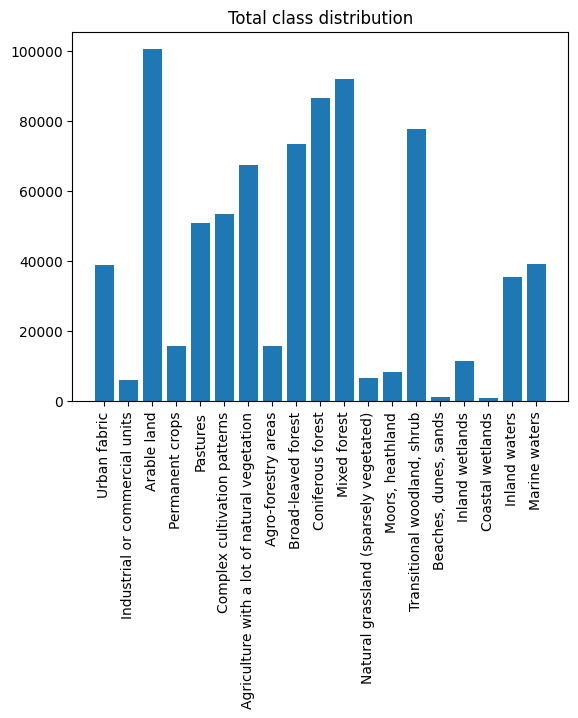

In [9]:
counts = labels.sum(axis=0)
plt.bar(class_names, counts)
plt.xticks(rotation=90)
plt.title("Total class distribution")
plt.savefig("images/class_distribution.png")
plt.show()

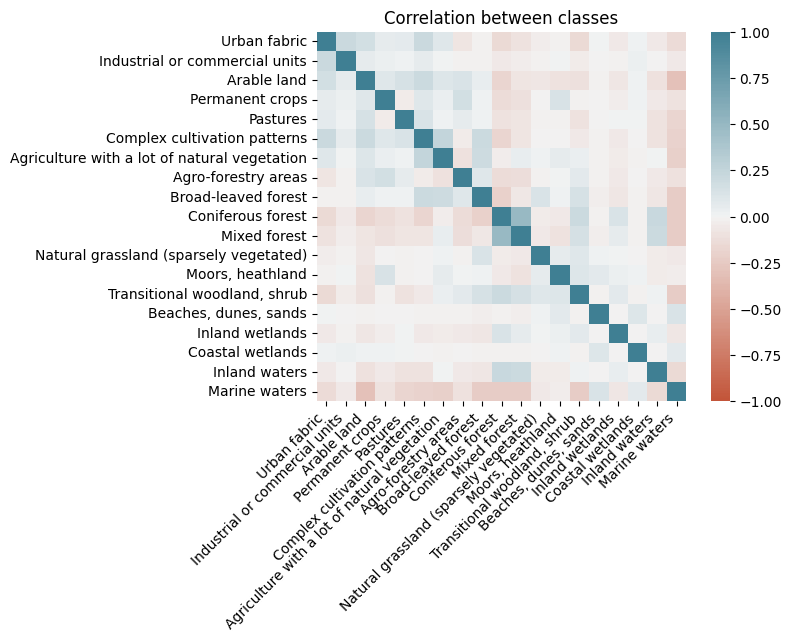

In [17]:
ax = sns.heatmap(
    pd.DataFrame(labels).corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    xticklabels=class_names,
    yticklabels=class_names
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Correlation between classes")
plt.savefig("images/correlation.png")
plt.show()